# RESULTS ANALYSIS - NARPS DATASET BY TEAM 1KB2

This notebook analyse the results obtained when reproducing the pipeline used by team **1KB2** for the NARPS Study. 

To use this notebook, replace the "exp_dir" by the directory where you stored the results of the previous notebook (**final_results** directory) and the "data_dir" by the directory where you stored the results of the original team **NARPS-1KB2** directory.   

Botvinik-Nezer, R., Holzmeister, F., Camerer, C.F., Dreber, A., Huber, J., Johannesson, M., Kirchler, M., Iwanir, R., Mumford, J.A., ..., Nichols, T.E., Poldrack, R.A., Schonberg, T. (2020). Variability in the analysis of a single neuroimaging dataset by many teams. Nature. https://doi.org/10.1038/s41586-020-2314-9.

In [1]:
from lib import bland_altman, download_original_maps, download_reproduced_maps
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from os.path import join as opj
from lib import activated_voxels
from nilearn import plotting, image

/local/egermani/miniconda3/envs/workEnv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
team_ID = '1KB2'

data_dir = '/local/egermani/analytic_variability_fmri/data/derived/original'

exp_dir = '/data/NARPS/analytic_variability_fmri/data/derived/reproduced'

fig_dir = '/local/egermani/analytic_variability_fmri/figures'

quality_measures_dir = '/local/egermani/analytic_variability_fmri/figures/quality_measures'

result_dir = f"/local/egermani/analytic_variability_fmri/figures/quality_measures/{team_ID}"

collection_original = "4945"
collection_repro = ""

In [3]:
import os 
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
if not os.path.isdir(quality_measures_dir):
    os.mkdir(quality_measures_dir)
if not os.path.isdir(result_dir):
    os.mkdir(result_dir)

In [4]:
#download_original_maps.get_original_maps(collection_original, team_ID, data_dir)

In [5]:
#download_reproduced_maps.get_reproduced_maps('10383', team_ID, exp_dir)

In [6]:
original_unthresh = [opj(data_dir, f"NARPS-{team_ID}", 'hypo1_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo2_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo3_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo4_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo5_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo6_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo7_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo8_unthresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo9_unthresh.nii.gz')]

original_thresh = [opj(data_dir, f"NARPS-{team_ID}", 'hypo1_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo2_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo3_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo4_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo5_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo6_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo7_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo8_thresh.nii.gz'),
    opj(data_dir, f"NARPS-{team_ID}", 'hypo9_thresh.nii.gz')]

In [7]:
n_sub = 25
repro_unthresh = [opj(exp_dir, "NARPS-reproduction",
                      f"team_{team_ID}_nsub_{n_sub}_hypo{i}_unthresholded.nii.gz") for i in range(1,10)]

repro_thresh = [opj(exp_dir, "NARPS-reproduction",
                      f"team_{team_ID}_nsub_{n_sub}_hypo{i}_thresholded.nii.gz") for i in range(1,10)]

In [8]:
hypothesis = ['Positive effect of gain in ventromedial PFC - for the equal indifference group',
'Positive effect in of gain ventromedial PFC - for the equal range group', 
'Positive effect in of gain ventral striatum - for the equal indifference group',
'Positive effect in of gain ventral striatum - for the equal range group',
'Negative effect in of loss VMPFC - for the equal indifference group',
'Negative effect in of loss VMPFC - for the equal range group',
'Positive effect in of loss amygdala - for the equal indifference group',
'Positive effect in of loss amygdala - for the equal range group',
'Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition.']

### VISUALIZE DATA

In [9]:
from nilearn import datasets
atlas_cort = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')
atlas_sub = datasets.fetch_atlas_harvard_oxford('sub-prob-2mm')

coords = plotting.find_probabilistic_atlas_cut_coords(atlas_cort.maps)
coords_sub = plotting.find_probabilistic_atlas_cut_coords(atlas_sub.maps)

In [10]:
vmPFC = (int(coords[24][0]), int(coords[24][1]), int(coords[24][2]))
vs = (int(coords_sub[19][0]), int(coords_sub[19][1]), int(coords_sub[19][2]))
amygdala = (int(coords_sub[20][0]), int(coords_sub[20][1]), int(coords_sub[20][2]))

#### Thresholded maps

/local/egermani/miniconda3/envs/workEnv/lib/python3.8/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


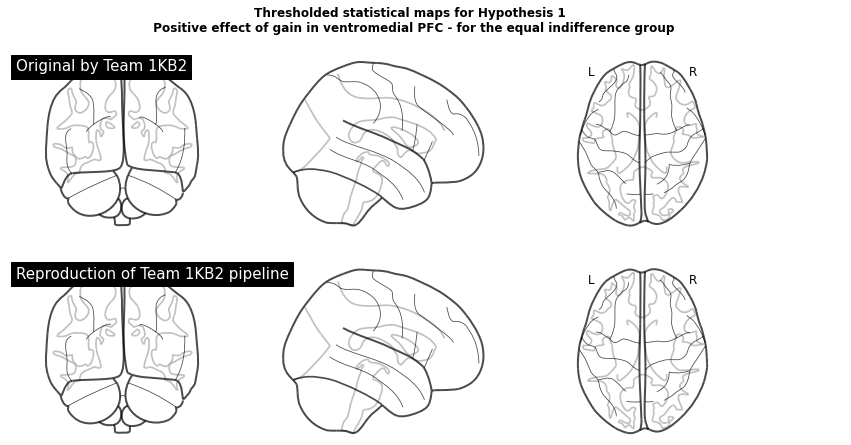

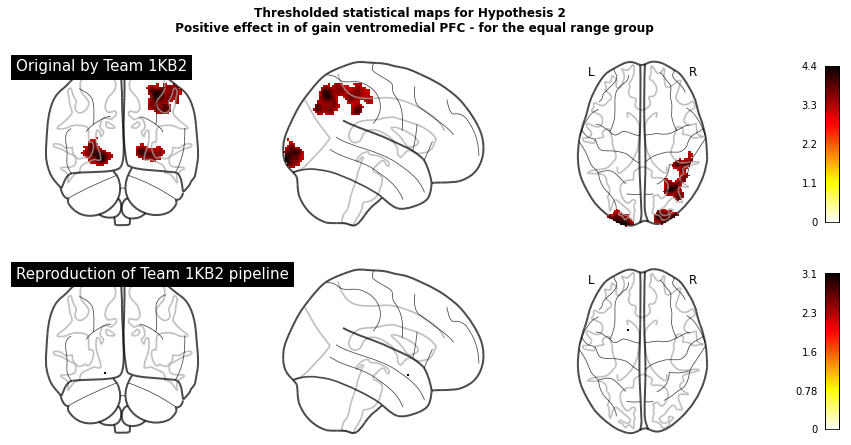

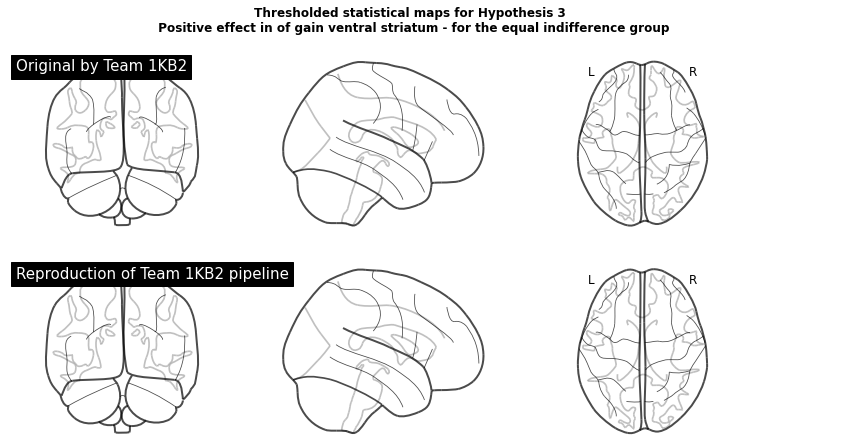

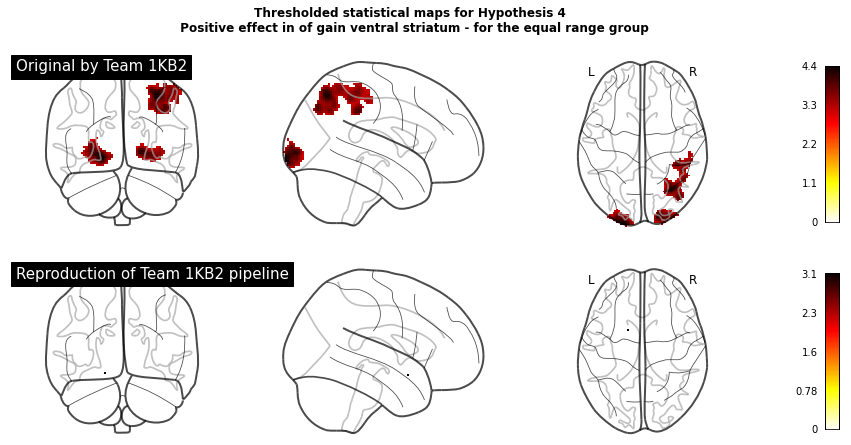

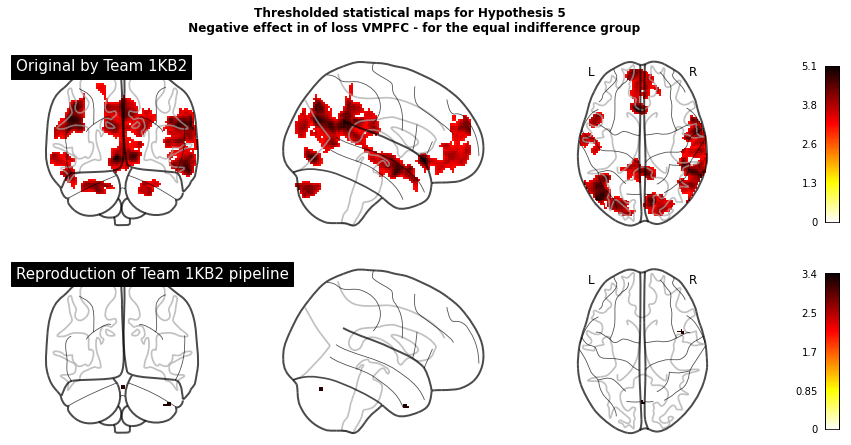

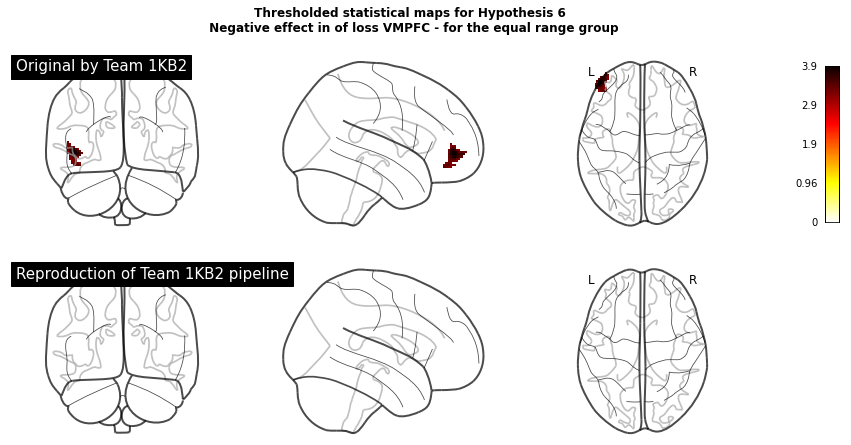

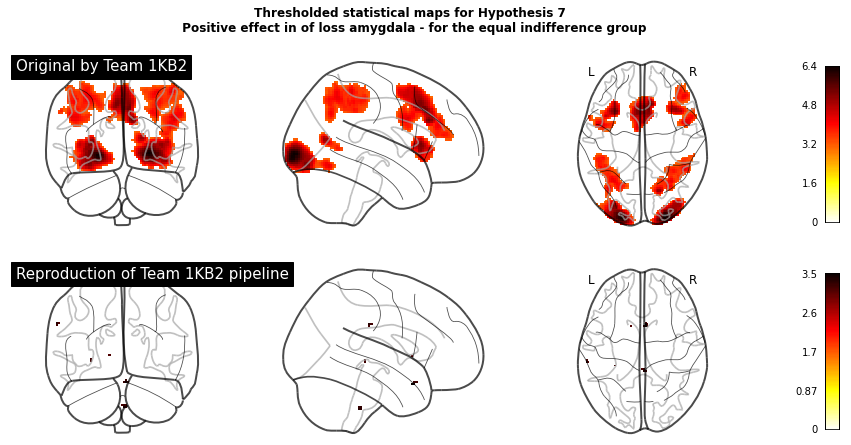

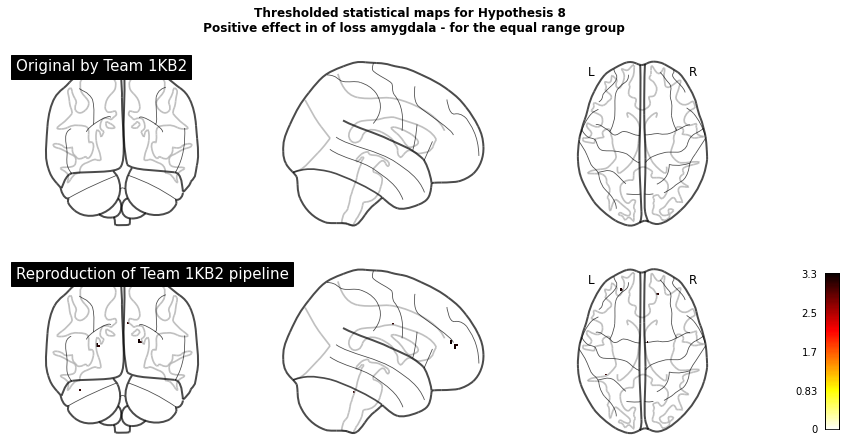

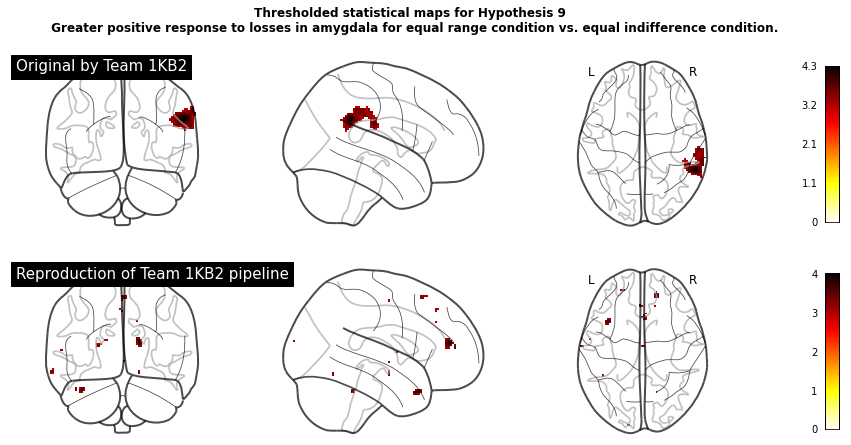

In [11]:
from nilearn import plotting

for i in range(len(original_thresh)):
    f = plt.figure(figsize = (15, 7))
    gs = f.add_gridspec(2, 1)
    ax1 = f.add_subplot(gs[0, 0])
    ax2 = f.add_subplot(gs[1, 0])
    f.suptitle(f"Thresholded statistical maps for Hypothesis {i+1} \n {hypothesis[i]}",
               fontweight = 'bold')
    plotting.plot_glass_brain(original_thresh[i], title = f"Original by Team {team_ID}", 
                        figure = f, axes = ax1, colorbar = True)
    plotting.plot_glass_brain(repro_thresh[i], title = f"Reproduction of Team {team_ID} pipeline",
                        figure = f, axes = ax2, colorbar = True)
    f.savefig(opj(result_dir, f"thresholded_gb_hypo{i+1}_{team_ID}.png"))

#### Unthresholded maps

/local/egermani/miniconda3/envs/workEnv/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


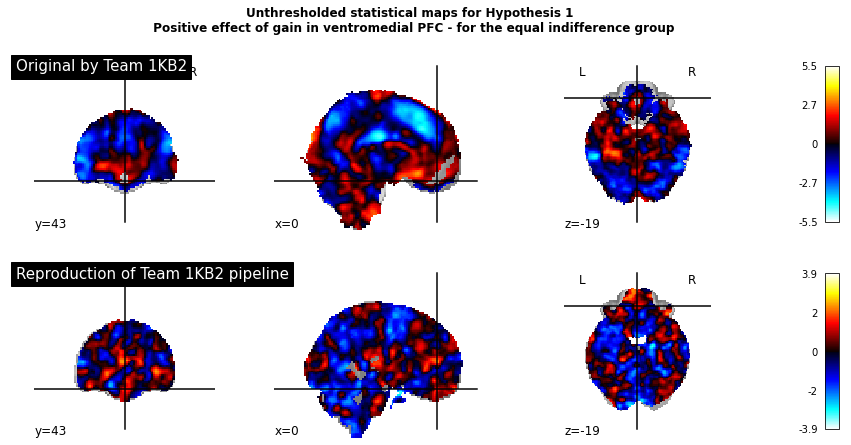

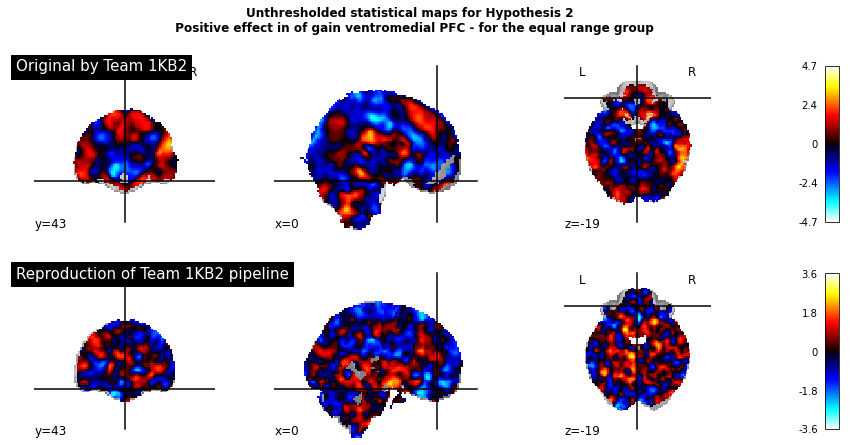

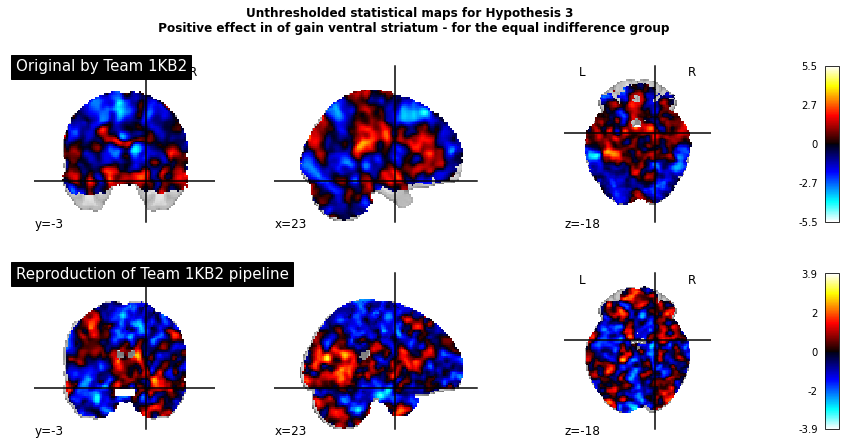

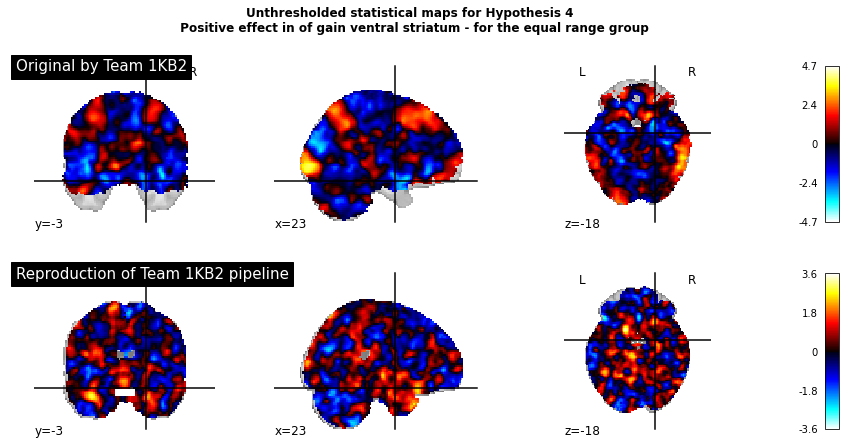

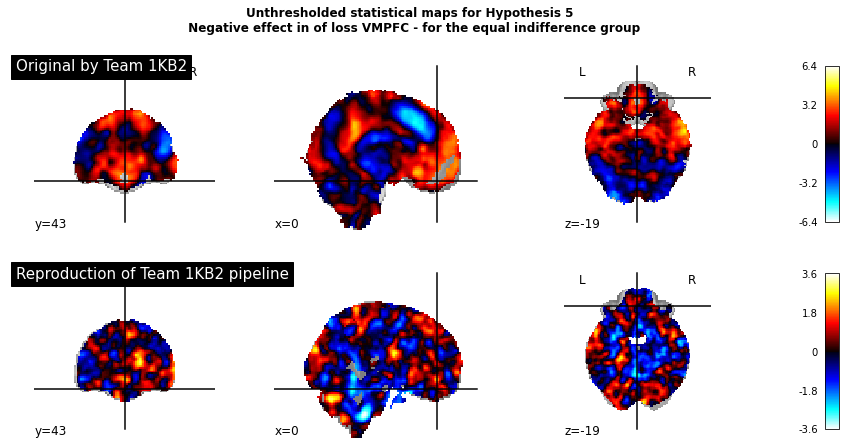

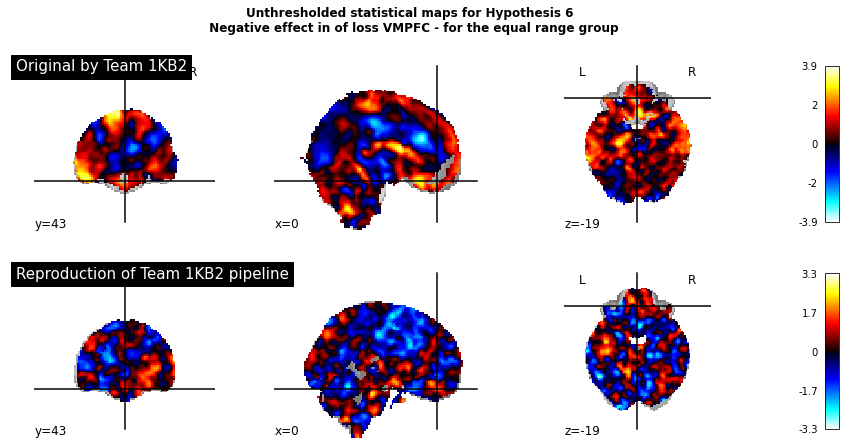

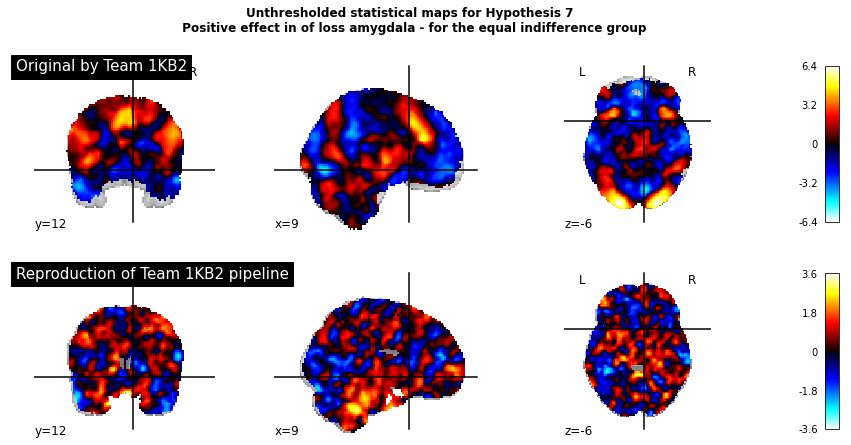

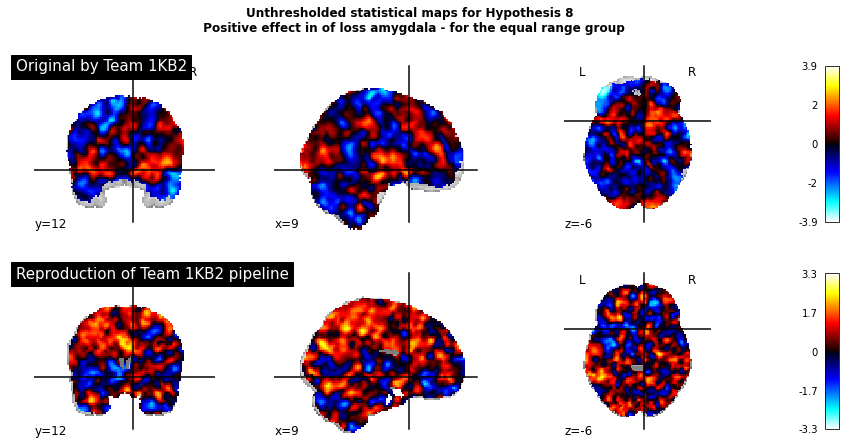

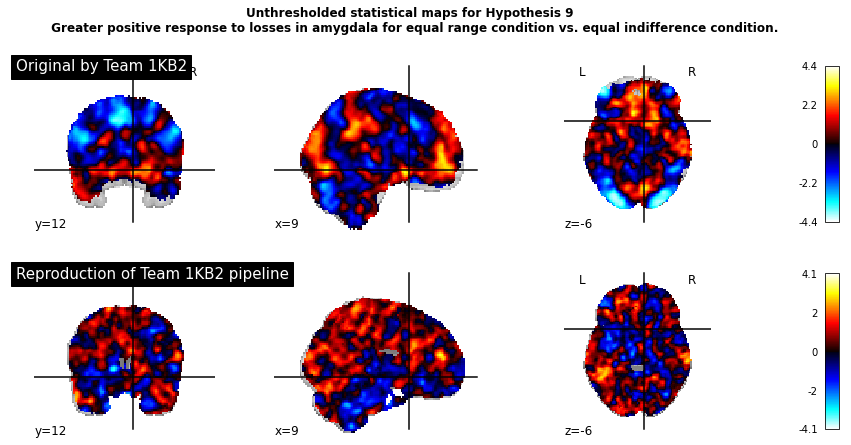

In [11]:
for i in range(len(original_unthresh)):
    if i in [0,1,4,5]:
        coords_cut = vmPFC
    elif i in [2,3]:
        coords_cut = vs
    else:
        coords_cut = amygdala
    
    f = plt.figure(figsize = (15, 7))
    gs = f.add_gridspec(2, 1)
    ax1 = f.add_subplot(gs[0, 0])
    ax2 = f.add_subplot(gs[1, 0])
    f.suptitle(f"Unthresholded statistical maps for Hypothesis {i+1} \n {hypothesis[i]}",
               fontweight = 'bold')
    plotting.plot_stat_map(original_unthresh[i], title = f"Original by Team {team_ID}", 
                        cut_coords = coords_cut, figure = f, axes = ax1)
    plotting.plot_stat_map(repro_unthresh[i], title = f"Reproduction of Team {team_ID} pipeline",
                        cut_coords = coords_cut, figure = f, axes = ax2)
    f.savefig(opj(result_dir, f"response_modeled_unthresholded_spm_hypo{i+1}_{team_ID}.png"))

### COMPARISON OF UNTHRESHOLDED MAPS 

### CORRELATIONS 

In [15]:
from lib import correlation
import pandas as pd 

coeff_list = []

print('Pearson\'s product-moment correlation coefficients for unthresh maps')

for i in range(len(repro_unthresh)):
    coeff_list.append(correlation.get_corr_coeff(repro_unthresh[i], original_unthresh[i], method='pearson'))
    print(hypothesis[i], ':', coeff_list[i])
    
coeff_df = pd.Series(coeff_list)
coeff_df.to_csv(opj(result_dir, 'corr_coeff.csv'))

Pearson's product-moment correlation coefficients for unthresh maps
Positive effect of gain in ventromedial PFC - for the equal indifference group : 0.9770053378571705
Positive effect in of gain ventromedial PFC - for the equal range group : 0.9601871566074633
Positive effect in of gain ventral striatum - for the equal indifference group : 0.9770053378571705
Positive effect in of gain ventral striatum - for the equal range group : 0.9601871566074633
Negative effect in of loss VMPFC - for the equal indifference group : 0.984767928097786
Negative effect in of loss VMPFC - for the equal range group : 0.9510693948482876
Positive effect in of loss amygdala - for the equal indifference group : 0.984767928097786
Positive effect in of loss amygdala - for the equal range group : 0.9510693948482876
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 0.9652907083664374


### MEAN SQUARED ERRORS / SUM OF SQUARED ERRORS

In [16]:
from lib import mse

print('Mean Squared Errors for UNTHRESHOLDED maps')
mse_list = []

for i in range(len(original_unthresh)):
    mse_list.append(mse.get_mse(original_unthresh[i], repro_unthresh[i]))
    print(hypothesis[i], ':', mse_list[i])
    
mse_df = pd.Series(mse_list)
mse_df.to_csv(opj(result_dir, 'mse.csv'))

Mean Squared Errors for UNTHRESHOLDED maps
Positive effect of gain in ventromedial PFC - for the equal indifference group : 0.1543717425031055
Positive effect in of gain ventromedial PFC - for the equal range group : 0.18324259471395316
Positive effect in of gain ventral striatum - for the equal indifference group : 0.1543717425031055
Positive effect in of gain ventral striatum - for the equal range group : 0.18324259471395316
Negative effect in of loss VMPFC - for the equal indifference group : 0.1528740250297413
Negative effect in of loss VMPFC - for the equal range group : 0.2000854969192571
Positive effect in of loss amygdala - for the equal indifference group : 0.1528740250297413
Positive effect in of loss amygdala - for the equal range group : 0.2000854969192571
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 0.13021509952837373


In [17]:
from lib import mse
import pandas as pd

print('Sum of Squared Errors for UNTHRESHOLDED maps')
sse_list = []

for i in range(len(original_unthresh)):
    sse_list.append(mse.get_sse(original_unthresh[i], repro_unthresh[i]))
    print(hypothesis[i], ':', sse_list[i])
    
sse_df = pd.Series(sse_list)
sse_df.to_csv(opj(result_dir, 'sse.csv'))

Sum of Squared Errors for UNTHRESHOLDED maps
Positive effect of gain in ventromedial PFC - for the equal indifference group : 25661.67787151874
Positive effect in of gain ventromedial PFC - for the equal range group : 30780.724574860422
Positive effect in of gain ventral striatum - for the equal indifference group : 25661.67787151874
Positive effect in of gain ventral striatum - for the equal range group : 30780.724574860422
Negative effect in of loss VMPFC - for the equal indifference group : 25412.707802768982
Negative effect in of loss VMPFC - for the equal range group : 33609.96160150297
Positive effect in of loss amygdala - for the equal indifference group : 25412.707802768982
Positive effect in of loss amygdala - for the equal range group : 33609.96160150297
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 21480.152603101003


### BLAND ALTMAN PLOT

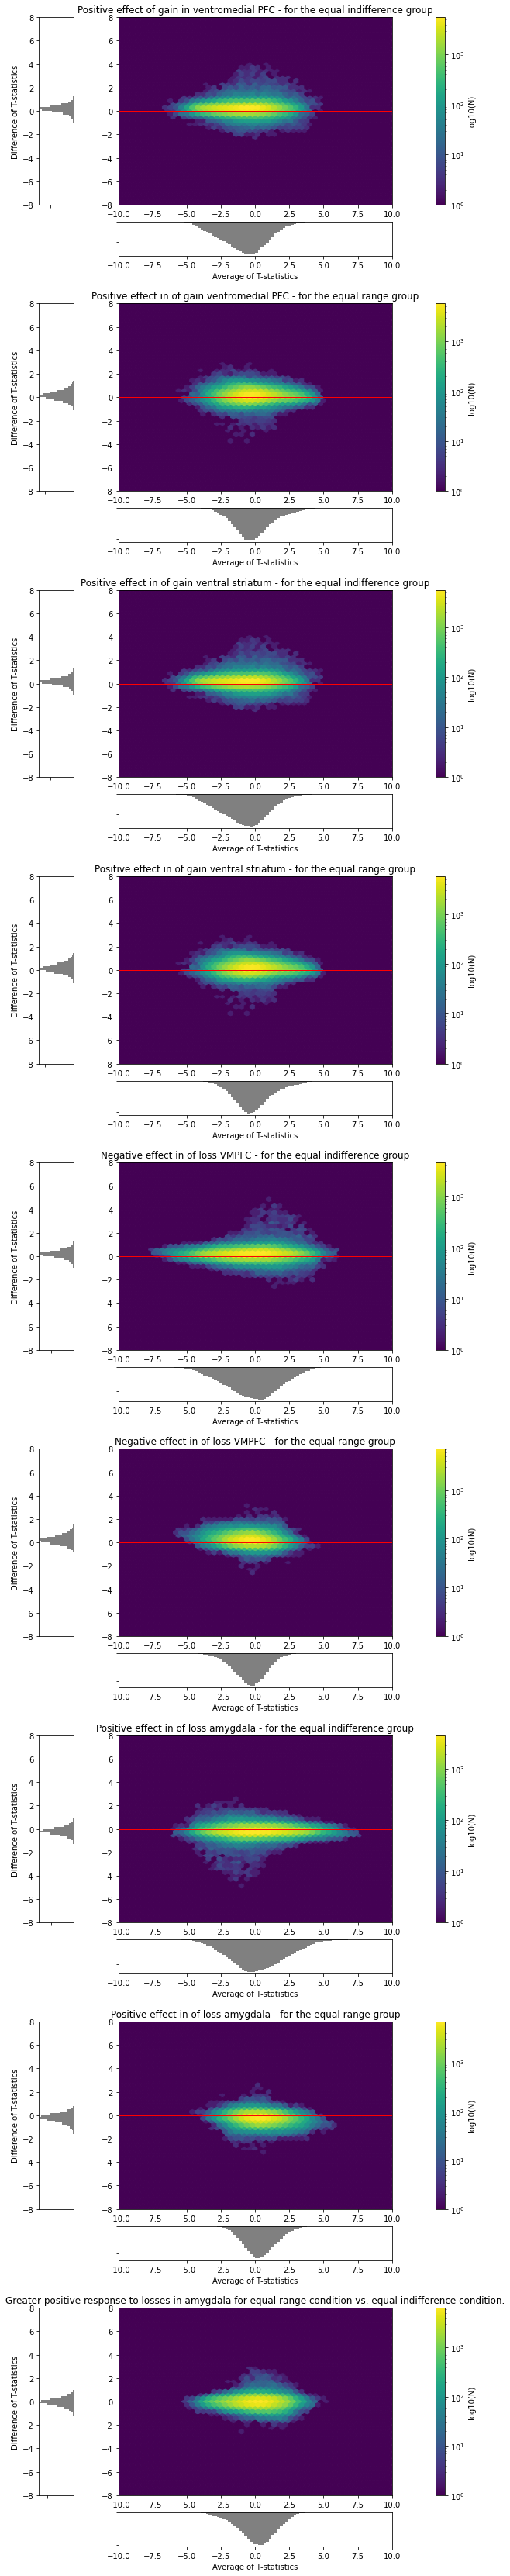

In [18]:
plt.style.use('seaborn-colorblind')

f = plt.figure(figsize=(10, 60))

gs0 = gridspec.GridSpec(len(repro_unthresh), 1, f)

x_label = ' of T-statistics'
y_label = ' of T-statistics'
lims=(-10,10,-8,8)

for i in range(len(repro_unthresh)):
    gs00 = gridspec.GridSpecFromSubplotSpec(
        5, 6, subplot_spec=gs0[i], hspace=0.50, wspace=1.3)

    bland_altman.bland_altman_plot(f, gs00, repro_unthresh[i], original_unthresh[i],
                  hypothesis[i],
                  x_label,
                  y_label,
                  False,
                  lims=lims)

plt.savefig(opj(result_dir, f"bland_altman_{team_ID}.png"))
plt.show()

### EULER CHARACTERISTICS

In [20]:
from lib import euler_chars
import numpy as np

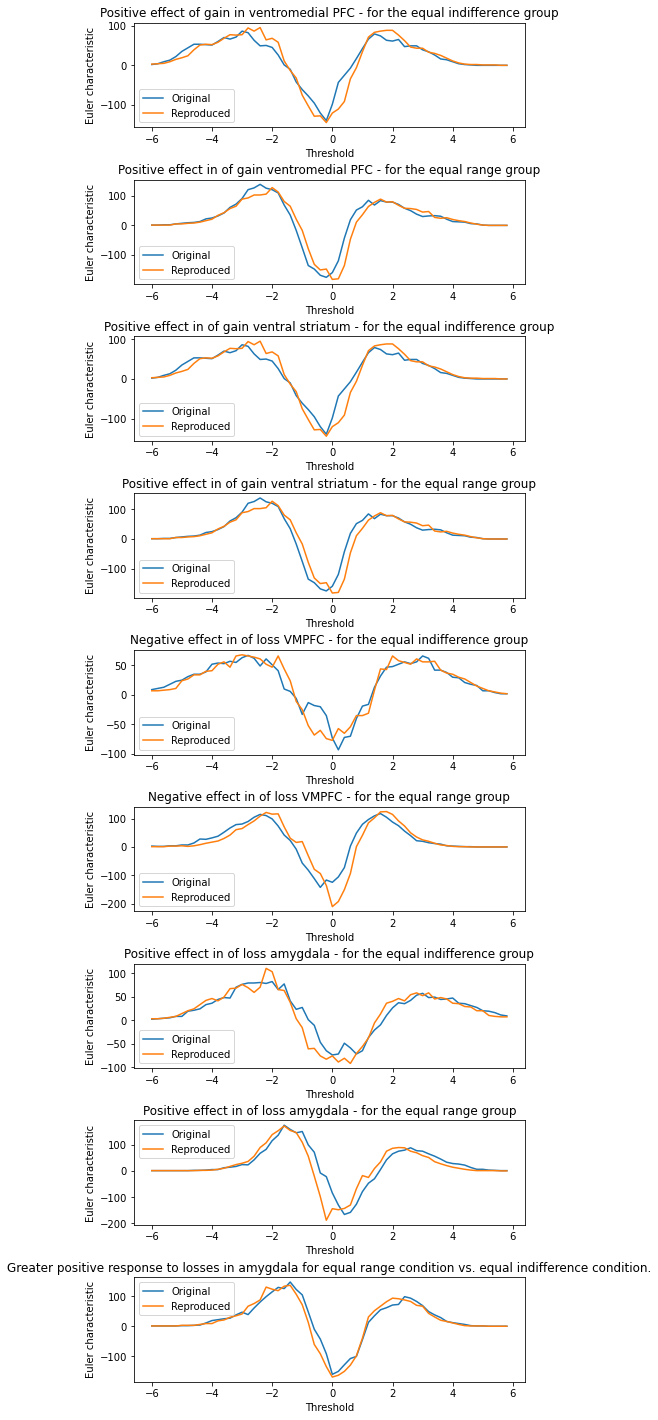

In [21]:
thresholds = np.arange(-6, 6, 0.2)

f = plt.figure(figsize=(7, 25))
gs = gridspec.GridSpec(len(original_unthresh), 1, f, hspace = 0.5)

plt.style.use('default')

for i in range(len(original_unthresh)):
    euler_chars.plot_euler_chars(f, gs, i, original_unthresh[i], repro_unthresh[i], thresholds, hypothesis[i])

plt.savefig(opj(result_dir, f"euler_chars_{team_ID}.png"))
plt.show()

### COMPARISON OF THRESHOLDED MAPS 

### NUMBER OF ACTIVATED VOXELS 

In [22]:
from lib import activated_voxels

print('Number of activated voxels in reproduced THRESHOLDED maps')

for i in range(len(repro_thresh)):
    print(hypothesis[i], ':',
         activated_voxels.get_number_activated_voxels(repro_thresh[i]))

Number of activated voxels in reproduced THRESHOLDED maps
Positive effect of gain in ventromedial PFC - for the equal indifference group : 151
Positive effect in of gain ventromedial PFC - for the equal range group : 2993
Positive effect in of gain ventral striatum - for the equal indifference group : 151
Positive effect in of gain ventral striatum - for the equal range group : 2993
Negative effect in of loss VMPFC - for the equal indifference group : 5641
Negative effect in of loss VMPFC - for the equal range group : 0
Positive effect in of loss amygdala - for the equal indifference group : 10204
Positive effect in of loss amygdala - for the equal range group : 1055
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 532


In [23]:
print('Number of activated voxels in original THRESHOLDED maps')
for i in range(len(original_thresh)):
    print(hypothesis[i], ':',
         activated_voxels.get_number_activated_voxels(original_thresh[i]))

Number of activated voxels in original THRESHOLDED maps
Positive effect of gain in ventromedial PFC - for the equal indifference group : 111
Positive effect in of gain ventromedial PFC - for the equal range group : 2604
Positive effect in of gain ventral striatum - for the equal indifference group : 111
Positive effect in of gain ventral striatum - for the equal range group : 2604
Negative effect in of loss VMPFC - for the equal indifference group : 4799
Negative effect in of loss VMPFC - for the equal range group : 0
Positive effect in of loss amygdala - for the equal indifference group : 13215
Positive effect in of loss amygdala - for the equal range group : 2295
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 492


### OVERLAP AND NON-OVERLAP BETWEEN THRESHOLDED MAPS

In [24]:
print('Overlap between reproduced thresholded maps and original ones')

for i in range(len(original_thresh)):
    print(hypothesis[i], ':', 
          activated_voxels.get_overlap_bw_voxels(original_thresh[i], repro_thresh[i], 
                                                 opj(result_dir, f"overlap_hypo{i+1}.nii"), 
                                                 opj(result_dir, f"non_overlap_hypo{i+1}.nii"))[0])

Overlap between reproduced thresholded maps and original ones
Positive effect of gain in ventromedial PFC - for the equal indifference group : 57
Positive effect in of gain ventromedial PFC - for the equal range group : 2038
Positive effect in of gain ventral striatum - for the equal indifference group : 57
Positive effect in of gain ventral striatum - for the equal range group : 2038
Negative effect in of loss VMPFC - for the equal indifference group : 3905
Negative effect in of loss VMPFC - for the equal range group : 0
Positive effect in of loss amygdala - for the equal indifference group : 9844
Positive effect in of loss amygdala - for the equal range group : 993
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 384


In [25]:
print('Non-overlap between reproduced thresholded maps and original ones')

for i in range(len(original_thresh)):
    print(hypothesis[i], ':', 
          activated_voxels.get_overlap_bw_voxels(original_thresh[i], repro_thresh[i], 
                                                 opj(result_dir, f"overlap_hypo{i+1}.nii"), 
                                                 opj(result_dir, f"non_overlap_hypo{i+1}.nii"))[1])

Non-overlap between reproduced thresholded maps and original ones
Positive effect of gain in ventromedial PFC - for the equal indifference group : 148
Positive effect in of gain ventromedial PFC - for the equal range group : 1521
Positive effect in of gain ventral striatum - for the equal indifference group : 148
Positive effect in of gain ventral striatum - for the equal range group : 1521
Negative effect in of loss VMPFC - for the equal indifference group : 2630
Negative effect in of loss VMPFC - for the equal range group : 0
Positive effect in of loss amygdala - for the equal indifference group : 3731
Positive effect in of loss amygdala - for the equal range group : 1364
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 256


In [26]:
from lib import dice

print('DICE coefficient between reproduced thresholded maps and original ones')

for i in range(len(original_thresh)):
    print(hypothesis[i], ':', dice.get_dice(original_thresh[i], repro_thresh[i]))

DICE coefficient between reproduced thresholded maps and original ones
Positive effect of gain in ventromedial PFC - for the equal indifference group : 0.4351145038167939
Positive effect in of gain ventromedial PFC - for the equal range group : 0.7282472753260676
Positive effect in of gain ventral striatum - for the equal indifference group : 0.4351145038167939
Positive effect in of gain ventral striatum - for the equal range group : 0.7282472753260676
Negative effect in of loss VMPFC - for the equal indifference group : 0.7480842911877394
Negative effect in of loss VMPFC - for the equal range group : nan
Positive effect in of loss amygdala - for the equal indifference group : 0.8406849139587514
Positive effect in of loss amygdala - for the equal range group : 0.5928358208955223
Greater positive response to losses in amygdala for equal range condition vs. equal indifference condition. : 0.75
